In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import random
import warnings 
import statistics

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [5]:
# Developing Countries
brazil_non_trending = pd.read_csv(
    "../data/developing/brazil/BrazilNonTrending.csv")
brazil_non_trending_size = brazil_non_trending.shape[0]
brazil_trending = pd.read_csv(
    "../data/developing/brazil/BrazilTrending.csv").sample(n=brazil_non_trending_size)
barzil = pd.concat([brazil_non_trending, brazil_trending], ignore_index=True)

mexico_non_trending = pd.read_csv(
    "../data/developing/mexico/MexicoNonTrending.csv")
mexico_non_trending_size = mexico_non_trending.shape[0]
mexico_trending = pd.read_csv(
    "../data/developing/mexico/MexicoTrending.csv").sample(n=mexico_non_trending_size)
mexico = pd.concat([mexico_non_trending, mexico_trending], ignore_index=True)

pakistan_non_trending = pd.read_csv(
    "../data/developing/pakistan/PakistanNonTrending.csv")
pakistan_non_trending_size = pakistan_non_trending.shape[0]
pakistan_trending = pd.read_csv(
    "../data/developing/pakistan/PakistanTrending.csv").sample(n=pakistan_non_trending_size)
pakistan = pd.concat(
    [pakistan_non_trending, pakistan_trending], ignore_index=True)

indonesia_non_trending = pd.read_csv(
    "../data/developing/indonesia/IndonesiaNonTrending.csv")
indonesia_non_trending_size = indonesia_non_trending.shape[0]
indonesia_trending = pd.read_csv(
    "../data/developing/indonesia/IndonesiaTrending.csv").sample(n=indonesia_non_trending_size)
indonesia = pd.concat(
    [indonesia_non_trending, indonesia_trending], ignore_index=True)

# Developed Countries
USA_non_trending = pd.read_csv("../data/developed/usa/USANonTrending.csv")
USA_non_trending_size = USA_non_trending.shape[0]
USA_trending = pd.read_csv(
    "../data/developed/usa/USATrending.csv").sample(n=USA_non_trending_size)
USA = pd.concat([USA_non_trending, USA_trending], ignore_index=True)

japan_non_trending = pd.read_csv(
    "../data/developed/japan/JapanNonTrending.csv")
japan_non_trending_size = japan_non_trending.shape[0]
japan_trending = pd.read_csv(
    "../data/developed/japan/JapanTrending.csv").sample(n=japan_non_trending_size)
japan = pd.concat([japan_non_trending, japan_trending], ignore_index=True)

canada_non_trending = pd.read_csv(
    "../data/developed/canada/CanadaNonTrending.csv")
canada_non_trending_size = canada_non_trending.shape[0]
canada_trending = pd.read_csv(
    "../data/developed/canada/CanadaTrending.csv").sample(n=canada_non_trending_size)
canada = pd.concat([canada_non_trending, canada_trending], ignore_index=True)

germany_non_trending = pd.read_csv(
    "../data/developed/germany/GermanyNonTrending.csv")
germany_non_trending_size = germany_non_trending.shape[0]
germany_trending = pd.read_csv(
    "../data/developed/germany/GermanyTrending.csv").sample(n=germany_non_trending_size)
germany = pd.concat(
    [germany_non_trending, germany_trending], ignore_index=True)

df_trending = pd.concat([brazil_trending, USA_trending, mexico_trending, japan_trending,
                        pakistan_trending, canada_trending, indonesia_trending, germany_trending], ignore_index=True)
df_non_trending = pd.concat([brazil_non_trending, USA_non_trending, mexico_non_trending, japan_non_trending,
                            pakistan_non_trending, canada_non_trending, indonesia_non_trending, germany_non_trending], ignore_index=True)

df_trending_developed = pd.concat(
    [USA_trending, japan_trending, canada_trending, germany_trending], ignore_index=True)
df_trending_developing = pd.concat(
    [brazil_trending, mexico_trending, indonesia_trending, pakistan_trending], ignore_index=True)
df_non_trending_developed = pd.concat(
    [USA_non_trending, japan_non_trending, canada_non_trending, germany_non_trending], ignore_index=True)
df_non_trending_developing = pd.concat(
    [brazil_non_trending, mexico_non_trending, indonesia_non_trending, pakistan_non_trending], ignore_index=True)
df_trending_developed['Category'] = 'Trending'
df_trending_developing['Category'] = 'Trending'
df_non_trending_developed['Category'] = 'Non-Trending'
df_non_trending_developing['Category'] = 'Non-Trending'

df_developed = pd.concat([df_trending_developed, df_non_trending_developed])
df_developed['Region'] = 'Developed'

df_developing = pd.concat([df_trending_developing, df_non_trending_developing])
df_developing['Region'] = 'Developing'


combined_df = pd.concat([df_developed, df_developing], ignore_index=True)

### Figure 1

In [6]:
def figure1Consumption(df, skip, region, category):
        all_proportions=[]
        ads_dict_list=[]
        for index, row in df.iterrows():
            temp_dict = row.to_dict()
            total_ads = temp_dict['Total Number of Ads']
            if total_ads == 0:
                 continue
            ad_bytes_sum = 0

            for i in range(1,int(total_ads)+1):
                size_ad = row[f'Advertisement {i} Size(Bytes)']
                ad_duration = row[f'Advertisement {i} Durationn(s)']
                skippable_value = row[f"Advertisement {i} Skippable"]

                if int(skippable_value)==1:
                    if skip == 1:
                        ad_bytes = (5/ad_duration)* size_ad
                        ad_bytes_sum = ad_bytes + ad_bytes_sum
                    else:
                         ad_bytes = size_ad
                         ad_bytes_sum = ad_bytes + ad_bytes_sum
                         
                elif int(skippable_value)==0:
                    ad_bytes = size_ad
                    ad_bytes_sum = ad_bytes + ad_bytes_sum
                   
            proportion_of_total = (ad_bytes_sum/(ad_bytes_sum+temp_dict['Size Original (Bytes)']))*100
            all_proportions.append(proportion_of_total)
        
        for i in all_proportions:
            to_add_dict = {
                    "Region": region,
                    "Category":category,
                    "Data":i, 
                }
            ads_dict_list.append(to_add_dict)    
        
        new_df = pd.DataFrame(ads_dict_list).dropna()
        return new_df


# Text Values
developing_notskipped = figure1Consumption(df_developing,0, "Developing", "Developing")
developed_notskipped = figure1Consumption(df_developed,0, "Developed", "Developed")
trending_notskipped = figure1Consumption(df_trending,0, "Trending", "Trending")
nontrending_notskipped = figure1Consumption(df_non_trending,0, "Non-Trending", "Non-Trending")

print("When Ads Not Skipped")
print("Trending Median:", trending_notskipped['Data'].median())
print("NonTrending Median:", nontrending_notskipped['Data'].median())
print("Developing Median:", developing_notskipped['Data'].median())
print("Developed Median:", developed_notskipped['Data'].median())
print()
print("Trending Mean:", trending_notskipped['Data'].mean())
print("NonTrending Mean:", nontrending_notskipped['Data'].mean())
print("Developing Mean:", developing_notskipped['Data'].mean())
print("Developed Mean:", developed_notskipped['Data'].mean())
print()


developing_skipped = figure1Consumption(df_developing,1, "Developing", "Trending")
developed_skipped = figure1Consumption(df_developed,1, "Developed", "Trending")
trending_skipped = figure1Consumption(df_trending,1, "Developed", "Non-Trending")
nontrending_skipped = figure1Consumption(df_non_trending,1, "Developed", "Non-Trending")
overall_skipped = figure1Consumption(combined_df,1, "Developed", "Non-Trending")

print()
print("When Ads Are Skipped")
print("Trending Median:", trending_skipped['Data'].median())
print("NonTrending Median:", nontrending_skipped['Data'].median())
print("Developing Median:", developing_skipped['Data'].median())
print("Developed Median:", developed_skipped['Data'].median())
print("Overall Median:", overall_skipped["Data"].median())


print("")
print("Trending Mean:", trending_skipped['Data'].mean())
print("NonTrending Mean:", nontrending_skipped['Data'].mean())
print("Developing Mean:", developing_skipped['Data'].mean())
print("Developed Mean:", developed_skipped['Data'].mean())
print("Overall Mean:", overall_skipped["Data"].mean())


# Figure Values
developing_trending_notskipped = figure1Consumption(df_trending_developing, 0,"Developing", "Trending")
developing_nontrending_notskipped = figure1Consumption(df_non_trending_developing,0, "Developing", "Non-Trending")
developed_trending_notskipped = figure1Consumption(df_trending_developed,0, "Developed", "Trending")
developed_nontrending_notskipped = figure1Consumption(df_non_trending_developed,0, "Developed", "Non-Trending")
ad_compare_concat = pd.concat([developing_trending_notskipped,developing_nontrending_notskipped,developed_trending_notskipped,developed_nontrending_notskipped])

developing_trending_skipped = figure1Consumption(df_trending_developing,1, "Developing", "Trending")
developing_nontrending_skipped = figure1Consumption(df_non_trending_developing,1, "Developing", "Non-Trending")
developed_trending_skipped = figure1Consumption(df_trending_developed,1, "Developed", "Trending")
developed_nontrending_skipped = figure1Consumption(df_non_trending_developed,1, "Developed", "Non-Trending")
ad_compare_concat_skipped = pd.concat([developing_trending_skipped,developing_nontrending_skipped,developed_trending_skipped,developed_nontrending_skipped])


print()
print("Figure Values:")
print(developing_trending_notskipped["Data"].median(),developing_trending_skipped["Data"].median())
print(developing_nontrending_notskipped["Data"].median(),developing_nontrending_skipped["Data"].median())
print(developed_trending_notskipped["Data"].median(),developed_trending_skipped["Data"].median())
print(developed_nontrending_notskipped["Data"].median(),developed_nontrending_skipped["Data"].median())



When Ads Not Skipped
Trending Median: 22.890358744791143
NonTrending Median: 15.001815910086094
Developing Median: 22.021744286960903
Developed Median: 14.47154411437327

Trending Mean: 30.605901325482705
NonTrending Mean: 22.286529074304045
Developing Mean: 29.516852322268516
Developed Mean: 22.632128153574964


When Ads Are Skipped
Trending Median: 2.7486268199957062
NonTrending Median: 1.979907330569247
Developing Median: 2.1061321868747154
Developed Median: 2.4113834989425693
Overall Median: 2.277266866517719

Trending Mean: 4.716428424887189
NonTrending Mean: 3.1279667097556785
Developing Mean: 4.331130199573031
Developed Mean: 3.384748525057043
Overall Mean: 3.8752066535492085

Figure Values:
29.70164417869802 2.7767828348166366
18.135709597012294 1.6665442892441242
17.637106999156224 2.7345404192741984
12.402497919324924 2.2007128567066183


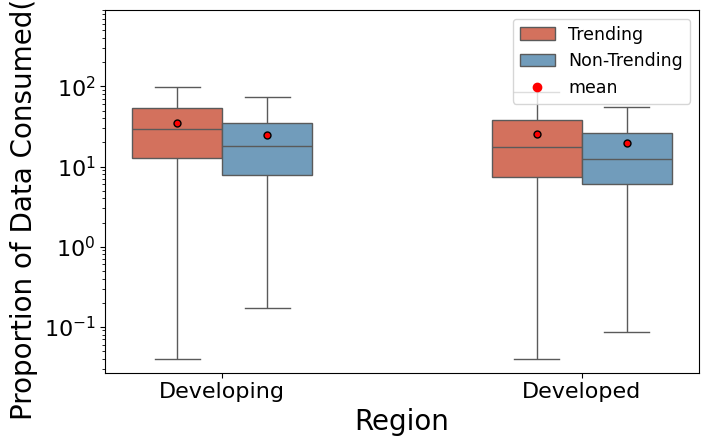

In [7]:
fig = plt.figure(figsize=(7,4.5))
colors = ["#e6644a", "#659ec7"]
sns.set_palette(sns.color_palette(colors))
ax=sns.boxplot(data=ad_compare_concat,x="Region",y="Data",hue="Category",width=0.5,showfliers=False,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})

ax.set_ylabel("Proportion of Data Consumed(%)", fontsize=20)
ax.set_yscale("log")

ax.set_xlabel("Region", fontsize=20)
ax.set_ylim(top=900)
ax.margins(y=0.4)

ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.plot([], [], 'o',  color='red', label='mean')
plt.legend(loc='upper right', fontsize=12.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("./plot-1-1.pdf",format="pdf", bbox_inches = "tight")

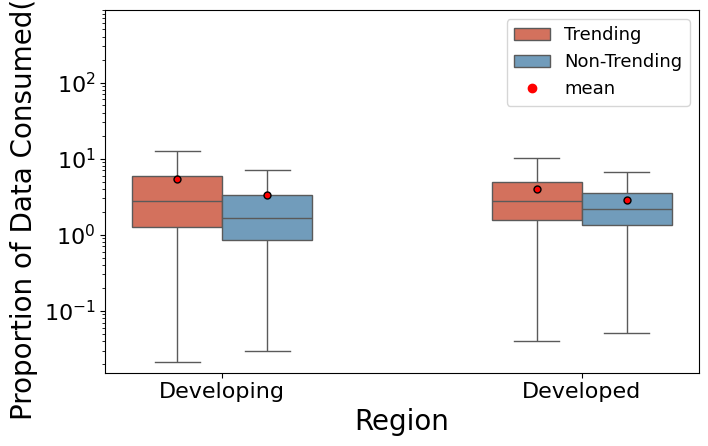

In [8]:
fig = plt.figure(figsize=(7,4.5))
colors = ["#e6644a", "#659ec7"]
sns.set_palette(sns.color_palette(colors))
ax=sns.boxplot(data=ad_compare_concat_skipped,x="Region",y="Data",hue="Category",width=0.5,showfliers=False,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})

ax.set_ylabel("Proportion of Data Consumed(%)", fontsize=20)
ax.set_yscale("log")

ax.set_xlabel("Region", fontsize=20)
ax.set_ylim(top=900)
ax.margins(y=0.4)

ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.plot([], [], 'o',  color='red', label='mean')
plt.legend(loc='upper right', fontsize=13)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("./plot-1-2.pdf",format="pdf", bbox_inches = "tight")

### Ad Gap (Using Old Version For Now)

In [9]:
def get_gaps(df, region, type):
    gaps = []
    for index, row in df.iterrows():
        temp_dict = row.to_dict()
        total_ads = temp_dict['Total Number of Ads']
        if total_ads == 1:
            gaps.append(row[f'Avertisement 1 Timestamp'])
        else:
            i = 1
            while i <= int(total_ads):
                if i == 1:
                    gaps.append(row[f'Avertisement 1 Timestamp'])
                    i = i + 1
                else:
                    ad_timestamp_current = row[f'Avertisement {i} Timestamp']
                    ad_timestamp_prev = row[f'Avertisement {i-1} Timestamp']

                    if ad_timestamp_current == ad_timestamp_prev:
                        i = i + 1
                        continue
                    else:
                        gap = ad_timestamp_current - ad_timestamp_prev
                        gaps.append(gap)
                        i = i + 1
    gaps = [gap / 60 for gap in gaps]
    gaps_df = pd.DataFrame({'Gap': gaps, "Category": type, "Region": region})
    gaps_df = gaps_df[gaps_df['Gap']>=0]
    return gaps_df

trending_gaps = get_gaps(df_trending, "Developing", "Trending")
nontrending_gaps = get_gaps(df_non_trending, "Developing", "Non-Trending")
developed_gaps = get_gaps(df_developed, "Developed", "Trending")
developing_gaps = get_gaps(df_developing, "Developed", "Non-Trending")

print("Trending Developed Gaps", trending_gaps["Gap"].mean())
print("Non-Trending Developed Gaps", nontrending_gaps["Gap"].mean())
print("Trending Developing Gaps", developing_gaps["Gap"].mean())
print("NonTrending Developed Gaps", developed_gaps["Gap"].mean())

Trending Developed Gaps 4.60905274574258
Non-Trending Developed Gaps 6.104057292769539
Trending Developing Gaps 4.894893611989393
NonTrending Developed Gaps 5.993134651925926


### Figure 3

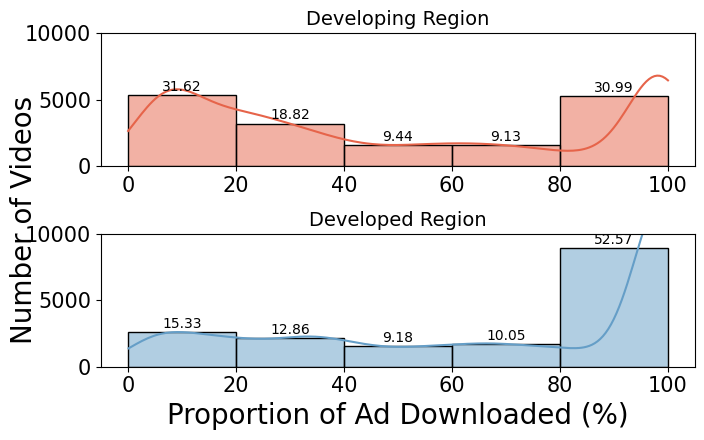

In [10]:
def figure3Data (df):
    total_downloaded = []
    ads_dict_list=[]
    for index,row in df.iterrows():
        temp_dict = row.to_dict()
        total_ads = temp_dict['Total Number of Ads']
        
        for i in range(1,int(total_ads)+1):
            ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)'] 
            ad_duration = row[f'Advertisement {i} Durationn(s)'] 
            ad_skippable = row[f'Advertisement {i} Skippable']
            
            if int(ad_skippable)==1:
                ad_buff_val = min(ad_buff_val, ad_duration)
                overall = (ad_buff_val/ad_duration) * 100
                total_downloaded.append(overall)
              
    for item in total_downloaded:
        to_add_dict = {
            "Data": item
        }
        ads_dict_list.append(to_add_dict)    
    
    return pd.DataFrame(ads_dict_list).dropna()

developed_fig3 = figure3Data (df_developed)
developing_fig3 = figure3Data(df_developing)

developed_fig3 = developed_fig3.sample(n= 17000, random_state=1)
developing_fig3 = developing_fig3.sample(n= 17000, random_state=1)

concat_ad=pd.concat([developed_fig3,developing_fig3])

flat_list = list(developing_fig3['Data'])
flat_list2 = list(developed_fig3['Data'])
flat_list_list=[flat_list,flat_list2]

bins = [0, 20, 40, 60, 80, 100] 
bins_2 = [0, 20, 40, 60, 80, 100]

f,axs = plt.subplots(2,figsize=(7, 4.5))

# set a palette with contrasting colors
colors = ["#e6644a", "#659ec7"]
sns.histplot(data=flat_list,bins=bins,ax=axs[0],kde=True, color=colors[0])
sns.histplot(data=flat_list2,bins=bins_2,ax=axs[1],kde=True, color=colors[1])

axs[1].set_xlabel("Proportion of Ad Downloaded (%)",fontsize=20)
axs[0].set_title("Developing Region", fontsize=14)
axs[1].set_title("Developed Region", fontsize=14)
axs[1].set_ylabel("")
axs[0].set_ylabel("")
axs[0].set_ylim(top=10000)
axs[1].set_ylim(top=10000)

axs[0].xaxis.set_tick_params(labelsize=15)
axs[0].yaxis.set_tick_params(labelsize=15)
axs[1].xaxis.set_tick_params(labelsize=15)
axs[1].yaxis.set_tick_params(labelsize=15)

f.text(0.00005, 0.5, 'Number of Videos', va='center', rotation='vertical',fontsize=20)
f.subplots_adjust(hspace=0.5)

for i in range(len(axs)):
    for p in axs[i].patches:
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            axs[i].text(x + w / 2, h, f'{h / len(flat_list_list[i]) * 100:.2f}\n', ha='center', va='center', size=10)
        axs[i].margins(y=0.2)

# plt.subplots_adjust(bottom=0.4, top=0.9, hspace=0.3)
plt.tight_layout()
plt.savefig("./plot-4.pdf",format="pdf", bbox_inches='tight')


### Figure 4

Skip Loss
Trending Median: 5.906394006048233
NonTrending Median: 3.9034615402544297
Developing Median: 4.338484674760595
Developed Median: 5.132290125033593


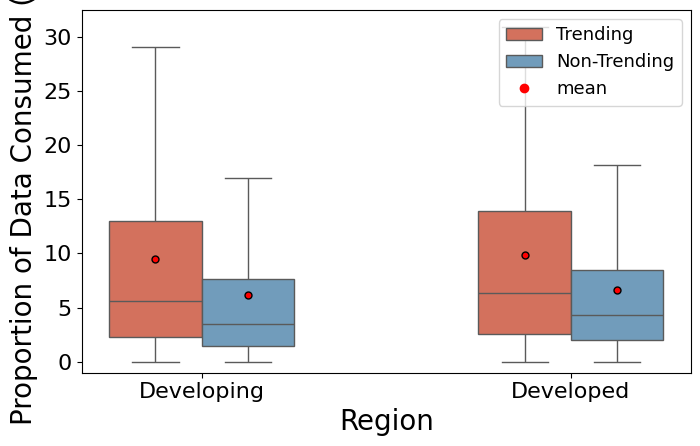

In [11]:
def figure4Data (df,region, category):
    all_proportions=[]
    ads_dict_list=[]
    for index, row in df.iterrows():
        temp_dict = row.to_dict()
        total_ads = temp_dict['Total Number of Ads']
        if total_ads == 0:
            continue
        ad_bytes_sum = 0

        for i in range(1,int(total_ads)+1):
            size_ad = row[f'Advertisement {i} Size(Bytes)']
            ad_duration = row[f'Advertisement {i} Durationn(s)']
            skippable_value = row[f"Advertisement {i} Skippable"]
            ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)'] 

            if int(skippable_value)==1:
                ad_bytes = ((ad_buff_val - 5)/ad_duration)* size_ad
                ad_bytes_sum = ad_bytes_sum + ad_bytes
               
        proportion_of_total = (ad_bytes_sum/(ad_bytes_sum+temp_dict['Size Original (Bytes)']))*100
        all_proportions.append(proportion_of_total)
    
    for i in all_proportions:
        to_add_dict = {
                "Region": region,
                "Category":category,
                "Data":i, 
            }
        ads_dict_list.append(to_add_dict)    
    
    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df
    
# Text Values
developing_skiploss = figure4Data(df_developing, "Developing", "Trending")
developed_skiploss = figure4Data(df_developed,"Developed", "Trending")
trending_skiploss = figure4Data(df_trending,"Developed", "Non-Trending")
nontrending_skiploss = figure4Data(df_non_trending,"Developed", "Non-Trending")

# print()
print("Skip Loss")
print("Trending Median:", trending_skiploss['Data'].median())
print("NonTrending Median:", nontrending_skiploss['Data'].median())
print("Developing Median:", developing_skiploss['Data'].median())
print("Developed Median:", developed_skiploss['Data'].median())

# Figure Data
developing_trending_skipped_skiploss = figure4Data(df_trending_developing, "Developing", "Trending")
developing_nontrending_skipped_skiploss = figure4Data(df_non_trending_developing, "Developing", "Non-Trending")
developed_trending_skipped_skiploss = figure4Data(df_trending_developed, "Developed", "Trending")
developed_nontrending_skipped_skiploss = figure4Data(df_non_trending_developed, "Developed", "Non-Trending")

ad_compare_concat_skipped_skiploss = pd.concat([developing_trending_skipped_skiploss,developing_nontrending_skipped_skiploss,developed_trending_skipped_skiploss,developed_nontrending_skipped_skiploss])

fig = plt.figure(figsize=(7,4.5))
colors = ["#e6644a", "#659ec7"]
sns.set_palette(sns.color_palette(colors))
ax=sns.boxplot(data=ad_compare_concat_skipped_skiploss,x="Region",y="Data",hue="Category",width=0.5,showfliers=False,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})

ax.set_ylabel("Proportion of Data Consumed (%)",fontsize=20)
ax.set_xlabel("Region",fontsize=20)
ax.set_ylim(bottom=-1)
ax.margins(y=0.4)

plt.tight_layout()
plt.plot([], [], 'o',  color='red', label='mean')
plt.legend(loc='upper right', fontsize=13)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("./plot-5.pdf",format="pdf", bbox_inches = "tight")

### Figure 5 (Using Previous)

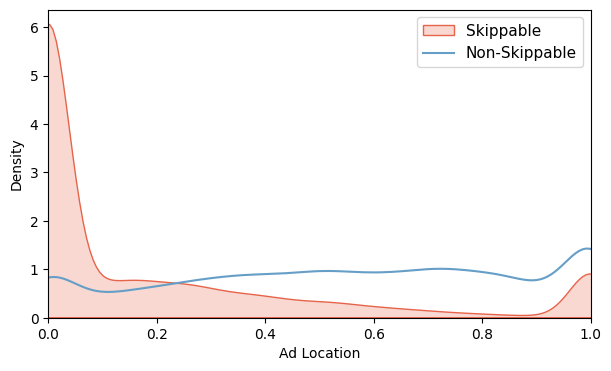

In [12]:
# Separate df for non-skippable ads 
def nonSkipDf(all_df, type):
    max_Total_Number_of_Ads = all_df['Total Number of Ads'].max()

    id_columns = [f'Advertisement {i} ID' for i in range(1, max_Total_Number_of_Ads+1)]
    ID = all_df[id_columns].to_numpy().flatten()

    skippable_columns = [f'Advertisement {i} Skippable' for i in range(1, max_Total_Number_of_Ads+1)]
    is_skippable = all_df[skippable_columns].to_numpy().flatten()

    original_size_columns = [f'Advertisement {i} Size(Bytes)' for i in range(1, max_Total_Number_of_Ads+1)]
    ad_size = all_df[original_size_columns].to_numpy().flatten()


    duration_columns = [f'Advertisement {i} Durationn(s)' for i in range(1, max_Total_Number_of_Ads+1)]
    ad_duration = all_df[duration_columns].to_numpy().flatten()

    ad_buffer_columns = [f'Advertisement {i} Advert_Buffer(s)' for i in range(1, max_Total_Number_of_Ads +1)]
    ad_buffers = all_df[ad_buffer_columns].to_numpy().flatten()

    buffer_lost_columns = [f'Advertisement {i} Main_Buffer_Lost(s)' for i in range(1, max_Total_Number_of_Ads +1)]
    buffer_lost = all_df[buffer_lost_columns].to_numpy().flatten()

    timestamp_columns = [f'Avertisement {i} Timestamp' for i in range(1, max_Total_Number_of_Ads +1)]
    timestamp = all_df[timestamp_columns].to_numpy().flatten()

    main_video_duration = [f'Duration(s)' for i in range(1, max_Total_Number_of_Ads +1)]
    main_duration = all_df[main_video_duration].to_numpy().flatten()


    non_skippable_ad_data = []
    skippable_ad_data = [] 
    
    if(type=="skippable"):
        for i in range(is_skippable.shape[0]):
            if is_skippable[i] == 1:
                complete_video_data_2 = [ID[i],is_skippable[i], ad_size[i], ad_duration[i], ad_buffers[i], buffer_lost[i], timestamp[i], main_duration[i]]
                non_skippable_ad_data.append(complete_video_data_2)

        non_skippable_ad_data = pd.DataFrame(non_skippable_ad_data, columns=['Ad ID','Skippable', 'Ad Size (Bytes)', 'Ad Duration (s)', 'Ad Buffer Downloaded (s)', 'Main Video Buffer Lost(s)', 'Timestamp', 'Duration(s)'])
        return non_skippable_ad_data 
    else: 
        for i in range(is_skippable.shape[0]):
            if is_skippable[i] == 0:
                complete_video_data_2 = [ID[i],is_skippable[i], ad_size[i], ad_duration[i], ad_buffers[i], buffer_lost[i], timestamp[i], main_duration[i]]
                skippable_ad_data.append(complete_video_data_2)
        skippable_ad_data = pd.DataFrame(skippable_ad_data, columns=['Ad ID','Skippable', 'Ad Size (Bytes)', 'Ad Duration (s)', 'Ad Buffer Downloaded (s)', 'Main Video Buffer Lost(s)', 'Timestamp', 'Duration(s)'])
        return skippable_ad_data
    
# Extracting skippable and non-skipabble DF 
skippable_df_plot8 = nonSkipDf(combined_df, "skippable")
skippable_df_plot8['Ad Location'] = skippable_df_plot8['Timestamp']/skippable_df_plot8['Duration(s)']
skippable_df_plot8.loc[skippable_df_plot8['Timestamp'] >= skippable_df_plot8['Duration(s)'], 'Ad Location'] = 1

nonskippable_df_plot8 = nonSkipDf(combined_df, "non-skippable") 
nonskippable_df_plot8['Ad Location'] = nonskippable_df_plot8['Timestamp']/nonskippable_df_plot8['Duration(s)']
nonskippable_df_plot8.loc[nonskippable_df_plot8['Timestamp'] >= nonskippable_df_plot8['Duration(s)'], 'Ad Location'] = 1

skippable_mean = skippable_df_plot8['Ad Location'].mean()
nonskippable_mean = nonskippable_df_plot8['Ad Location'].mean()

plt.rcParams["figure.figsize"] = (7,4)
sns.kdeplot(skippable_df_plot8['Ad Location'], label="Skippable", fill=True, color=colors[0])
sns.kdeplot(nonskippable_df_plot8['Ad Location'], label="Non-Skippable", color=colors[1])

plt.legend(fontsize=11)
plt.xlim(0,1)
plt.savefig("./plot-6.pdf",format="pdf")

### Figure 6

Proportion of Main-Video Lost to Mid-Roll Loss
Trending Median: 4.886339937434828
NonTrending Median: 5.112945838837516
Developing Median: 4.15785080248626
Developed Median: 5.7878610149819885


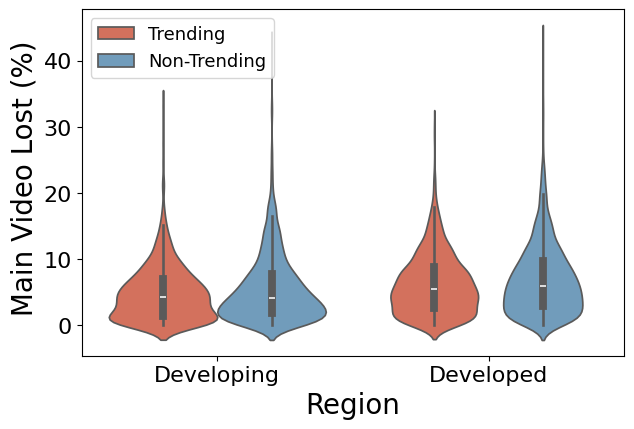

In [13]:
def figure6Data (df, region, category):
    all_proportions=[]
    ads_dict_list=[]
    for index,row in df.iterrows():
        try:
            temp_dict = row.to_dict()
            total_ads = temp_dict['Total Number of Ads']
            each_buff_lost=[]
            for i in range(1,int(total_ads)+1):
                buff_lost = row[f'Advertisement {i} Main_Buffer_Lost(s)']
                if buff_lost > 0:
                    each_buff_lost.append(buff_lost)

            if len(each_buff_lost) != 0:
                total_buff_lost = np.array(each_buff_lost).sum()
                proportion_lost = total_buff_lost/temp_dict['Duration(s)']*100
                all_proportions.append(proportion_lost)
            else:
                continue
        except:
            continue
    
    for i in all_proportions:
        to_add_dict = {
                "Region":region,
                "Category": category,
                "Data":i
            }
        ads_dict_list.append(to_add_dict)    
    
    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df

# Text Values
developing_midloss = figure6Data(df_developing, "Developing", "Developing")
developed_midloss = figure6Data(df_developed,"Developed", "Developed")
trending_midloss = figure6Data(df_trending,"Trending", "Trending")
nontrending_midloss = figure6Data(df_non_trending,"Non-Trending", "Non-Trending")

print("Proportion of Main-Video Lost to Mid-Roll Loss")
print("Trending Median:", trending_midloss['Data'].median())
print("NonTrending Median:", nontrending_midloss['Data'].median())
print("Developing Median:", developing_midloss['Data'].median())
print("Developed Median:", developed_midloss['Data'].median())

# Figure Data
developing_trending_skipped_midloss = figure6Data(df_trending_developing, "Developing", "Trending")
developing_nontrending_skipped_midloss = figure6Data(df_non_trending_developing, "Developing", "Non-Trending")
developed_trending_skipped_midloss = figure6Data(df_trending_developed, "Developed", "Trending")
developed_nontrending_skipped_midloss = figure6Data(df_non_trending_developed, "Developed", "Non-Trending")

midBuffLostTotal = pd.concat([developing_trending_skipped_midloss,developing_nontrending_skipped_midloss, developed_trending_skipped_midloss, developed_nontrending_skipped_midloss])

plt.rcParams["figure.figsize"] = (7,4.5)
sns.set_palette(sns.color_palette(colors))

ax = sns.violinplot(data=midBuffLostTotal,x="Region",y="Data",hue="Category", inner="box")
ax.set_ylabel(" Main Video Lost (%)", fontsize=20)
ax.set_xlabel("Region", fontsize=20)
plt.legend(loc='upper left', fontsize=13)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.savefig("./plot-9.pdf",format="pdf", bbox_inches = "tight")

### Figure 7

Mid-Roll Loss
Trending Median: 4.658700017895135
NonTrending Median: 4.864239887898154
Developing Median: 3.9918746068138957
Developed Median: 5.471195728067297


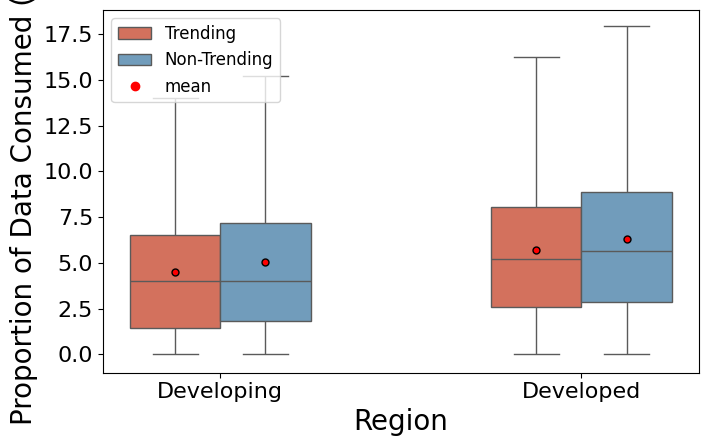

In [14]:
def figure7Data (df,region, category):
    all_proportions=[]
    ads_dict_list=[]
    for index, row in df.iterrows():
        temp_dict = row.to_dict()
        total_ads = temp_dict['Total Number of Ads']
        if total_ads == 0:
            continue
        ad_bytes_sum = 0
        main_vid_duration = temp_dict['Duration(s)']
        main_vid_size = temp_dict['Size Original (Bytes)']

        for i in range(1,int(total_ads)+1):
            buffer_loss = row[f'Advertisement {i} Main_Buffer_Lost(s)']

            if buffer_loss > 0:
                ad_bytes = (buffer_loss / main_vid_duration) * main_vid_size
                ad_bytes_sum = ad_bytes_sum + ad_bytes

        if ad_bytes_sum != 0:
            proportion_of_total = (ad_bytes_sum/(ad_bytes_sum+main_vid_size))*100
            all_proportions.append(proportion_of_total)
    
    for i in all_proportions:
        to_add_dict = {
                "Region": region,
                "Category":category,
                "Data":i, 
            }
        ads_dict_list.append(to_add_dict)    
    
    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df
    
# Text Values
developing_midlossprop = figure7Data(df_developing, "Developing", "Trending")
developed_midlossprop = figure7Data(df_developed,"Developed", "Trending")
trending_midlossprop = figure7Data(df_trending,"Developed", "Non-Trending")
nontrending_midlossprop = figure7Data(df_non_trending,"Developed", "Non-Trending")

# print()
print("Mid-Roll Loss")
print("Trending Median:", trending_midlossprop['Data'].median())
print("NonTrending Median:", nontrending_midlossprop['Data'].median())
print("Developing Median:", developing_midlossprop['Data'].median())
print("Developed Median:", developed_midlossprop['Data'].median())

# Figure Data
developing_trending_skipped_midloss = figure7Data(df_trending_developing, "Developing", "Trending")
developing_nontrending_skipped_midloss = figure7Data(df_non_trending_developing, "Developing", "Non-Trending")
developed_trending_skipped_midloss = figure7Data(df_trending_developed, "Developed", "Trending")
developed_nontrending_skipped_midloss = figure7Data(df_non_trending_developed, "Developed", "Non-Trending")

final_consumption_df = pd.concat([developing_trending_skipped_midloss, developing_nontrending_skipped_midloss, developed_trending_skipped_midloss, developed_nontrending_skipped_midloss])

fig = plt.figure(figsize=(7,4.5))
colors = ["#e6644a", "#659ec7"]
sns.set_palette(sns.color_palette(colors))
ax=sns.boxplot(data=final_consumption_df,x="Region",y="Data",hue="Category",width=0.5,showfliers=False,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})

ax.set_ylabel("Proportion of Data Consumed (%)",fontsize=20)
ax.set_xlabel("Region",fontsize=20)
ax.set_ylim(bottom=-1)
ax.margins(y=0.4)

plt.tight_layout()
plt.plot([], [], 'o',  color='red', label='mean')
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("./plot-10.pdf",format="pdf", bbox_inches = "tight")

### Figure 8

/tmp/ipykernel_34392/1519037799.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = add_placement_data.groupby(pd.cut(add_placement_data['Positions'], bins=bins, labels=labels))
/tmp/ipykernel_34392/1519037799.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = sampled_data.groupby('Placement Bin')['Loss'].describe()


                count       mean        std   min      25%     50%      75%  \
Placement Bin                                                                 
0-25%          1800.0  71.874978  71.264919  0.01  27.4700  58.185  92.0875   
25-50%         1800.0  58.067356  76.174140  0.01  13.1050  44.895  79.9325   
50-75%         1800.0  41.865661  52.130071  0.02   7.0800  26.490  62.2075   
75-100%        1800.0  33.973794  52.613750  0.02   6.7775  19.230  41.9625   

                   max  
Placement Bin           
0-25%           739.41  
25-50%         1877.48  
50-75%          840.58  
75-100%         872.64  


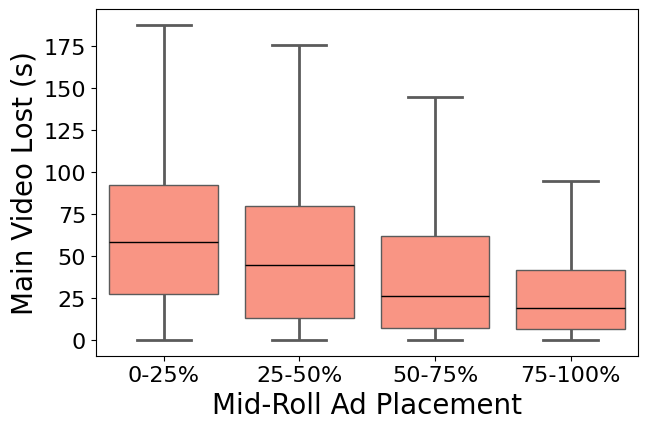

In [15]:
def figure8Data (df):
        all_losses=[]
        ad_positions = []
        ads_dict_list=[]
        for index,row in df.iterrows():
            try:
                temp_dict = row.to_dict()
                total_ads = temp_dict['Total Number of Ads']
                main_vid_duration = temp_dict['Duration(s)']

                for i in range(1,int(total_ads)+1):
                    buff_lost = row[f'Advertisement {i} Main_Buffer_Lost(s)']
                    timestamp = row[f'Avertisement {i} Timestamp']
                    # buff_lost = (buff_lost/main_vid_duration) * 100
                    position = (timestamp/main_vid_duration) * 100

                    if buff_lost > 0:
                        all_losses.append(buff_lost)
                        ad_positions.append(position)
            except:
                continue
        
        for i in range (len(all_losses)):
            to_add_dict = {
                 "Loss": all_losses[i],
                 "Positions": ad_positions[i]
                }
            ads_dict_list.append(to_add_dict)    
        
        new_df = pd.DataFrame(ads_dict_list).dropna()
        return new_df

add_placement_data = figure8Data(combined_df)
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
groups = add_placement_data.groupby(pd.cut(add_placement_data['Positions'], bins=bins, labels=labels))
sampled_data = groups.apply(lambda x: x.sample(n=1800, random_state=1))

sampled_data['Placement Bin'] = pd.cut(sampled_data['Positions'], bins=bins, labels=labels)

bin_stats = sampled_data.groupby('Placement Bin')['Loss'].describe()
print(bin_stats)

plt.figure(figsize=(7, 4.5)) 

# plt.rcParams.update({'font.size': 11})
colors = ["#e6644a", "#659ec7"]
# sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(x='Placement Bin', y='Loss', showfliers=False, data=sampled_data, 
            order=labels, 
            boxprops={'facecolor': "#f99584", 'linewidth': 1},
            medianprops={'color': 'black', 'linewidth': 1},
            whiskerprops={'linewidth': 2},
            capprops={'linewidth': 2})

# ax.set_ylabel('% of Main Video Lost Due to Mid-Roll-Loss')
ax.set_ylabel('Main Video Lost (s)', fontsize=20)
ax.set_xlabel('Mid-Roll Ad Placement', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("./plot-12.pdf",format="pdf",bbox_inches = "tight")

### Figure 9

Overall Consumption
Trending Median: 11.896381831997127
NonTrending Median: 9.5931776725524
Developing Median: 9.357302082250058
Developed Median: 11.676868725002363
Overall Median 10.525853672842949
Overall Mean 13.23664690614058


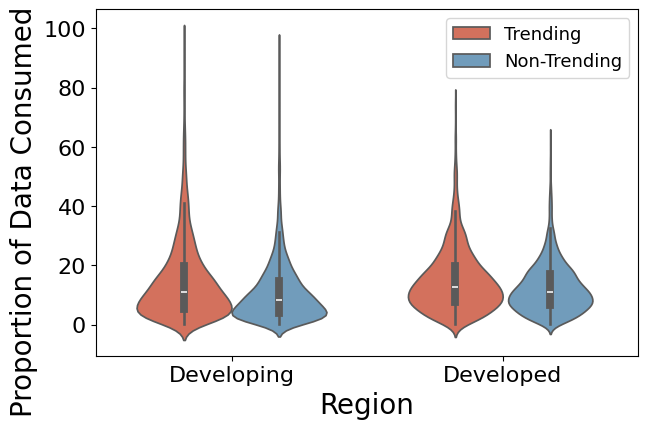

In [16]:
def figure9Data (df, region, category):
        all_proportions=[]
        ads_dict_list=[]
        for index, row in df.iterrows():
            temp_dict = row.to_dict()
            total_ads = temp_dict['Total Number of Ads']
            if total_ads == 0:
                 continue
            video_duration = temp_dict['Duration(s)']
            video_size = temp_dict['Size Original (Bytes)']
            ad_bytes_sum = 0
            for i in range(1,int(total_ads)+1):
                size_ad = row[f'Advertisement {i} Size(Bytes)']
                ad_duration = row[f'Advertisement {i} Durationn(s)']
                skippable_value = row[f"Advertisement {i} Skippable"]
                ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)']
                buffer_loss = row[f'Advertisement {i} Main_Buffer_Lost(s)'] 

                if int(skippable_value)==1:
                    ad_bytes = (ad_buff_val/ad_duration)* size_ad
                    ad_bytes_sum = ad_bytes_sum + ad_bytes
                elif int(skippable_value)==0:
                     ad_bytes = size_ad
                     ad_bytes_sum = ad_bytes_sum + ad_bytes
                if buffer_loss > 0:
                     ad_bytes = (buffer_loss/video_duration) * video_size
                     ad_bytes_sum = ad_bytes_sum + ad_bytes
                
            proportion_of_total = (ad_bytes_sum/(ad_bytes_sum+temp_dict['Size Original (Bytes)']))*100
            all_proportions.append(proportion_of_total)
        
        for i in all_proportions:
            to_add_dict = {
                    "Region": region,
                    "Category":category,
                    "Data":i, 
                }
            ads_dict_list.append(to_add_dict)    
        
        new_df = pd.DataFrame(ads_dict_list).dropna()
        return new_df

# Text Values
developing_overall = figure9Data(df_developing, "Developing", "Trending")
developed_overall = figure9Data(df_developed,"Developed", "Trending")
trending_overall = figure9Data(df_trending,"Developed", "Non-Trending")
nontrending_overall = figure9Data(df_non_trending,"Developed", "Non-Trending")
overall_consumption = figure9Data(combined_df, "overall", "overall")

print("Overall Consumption")
print("Trending Median:", trending_overall['Data'].median())
print("NonTrending Median:", nontrending_overall['Data'].median())
print("Developing Median:", developing_overall['Data'].median())
print("Developed Median:", developed_overall['Data'].median())
print("Overall Median", overall_consumption["Data"].median())
print("Overall Mean", overall_consumption["Data"].mean())
# Figure Values:
developing_trending_overall = figure9Data(df_trending_developing, "Developing", "Trending")
developing_nontrending_overall = figure9Data(df_non_trending_developing, "Developing", "Non-Trending")
developed_trending_overall = figure9Data(df_trending_developed, "Developed", "Trending")
developed_nontrending_overall = figure9Data(df_non_trending_developed, "Developed", "Non-Trending")

final_consumption_df = pd.concat([developing_trending_overall, developing_nontrending_overall, developed_trending_overall, developed_nontrending_overall])
plt.rcParams["figure.figsize"] = (7,4.5)
sns.set_palette(sns.color_palette(colors))
ax = sns.violinplot(data=final_consumption_df,y="Data", x="Region", hue="Category", width=0.7)
ax.set_ylabel("Proportion of Data Consumed (%)",fontsize=20)
ax.set_xlabel("Region",fontsize=20)

ax.legend(loc="upper right", fontsize=13)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("./plot-19.pdf",format="pdf",bbox_inches = "tight")

In [18]:
res_360 = pd.read_csv('../data/resolution_experiment/resolution_360p.csv')
res_720 = pd.read_csv('../data/resolution_experiment/resolution_720p.csv')

360p
count    292.000000
mean      13.496449
std       20.234948
min        0.096410
25%        1.690511
50%        4.043526
75%       15.718168
max      124.323793
Name: Data, dtype: float64
720p
count    273.000000
mean      22.270846
std       59.267722
min        0.261937
25%        1.699396
50%        4.331037
75%       18.248880
max      491.318368
Name: Data, dtype: float64


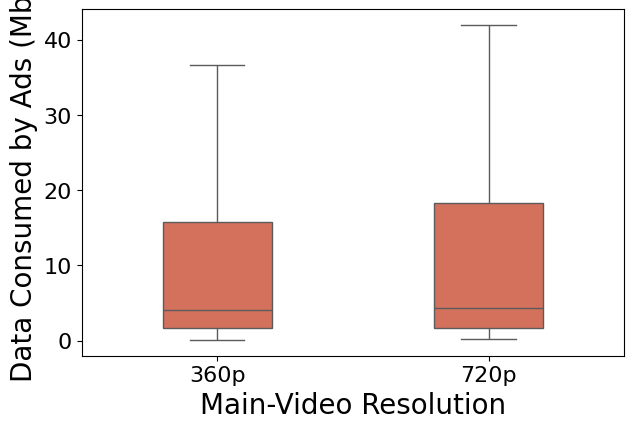

In [19]:
def getMb(val):
    ans = val/(1024*1024)
    return ans

def resolutionDataAllBytes (df, resolution):
    all_proportions=[]
    ads_dict_list=[]
    for index, row in df.iterrows():
        temp_dict = row.to_dict()
        total_ads = temp_dict['Total Number of Ads']
        if total_ads == 0:
            continue
        ad_bytes_sum = 0
        try:
            main_vid_duration = temp_dict['Duration(s)']
            main_vid_size = temp_dict['Size Original (Bytes)']
            for i in range(1,int(total_ads)+1):
                size_ad = row[f'Advertisement {i} Size(Bytes)']
                ad_duration = row[f'Advertisement {i} Durationn(s)']
                skippable_value = row[f"Advertisement {i} Skippable"]
                ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)']
                buffer_loss = row[f'Advertisement {i} Main_Buffer_Lost(s)'] 

                if int(skippable_value)==1:
                    ad_bytes = ((ad_buff_val)/ad_duration)* size_ad
                    ad_bytes_sum = ad_bytes_sum + ad_bytes
                elif int(skippable_value)==0:
                    ad_bytes_sum = ad_bytes_sum + size_ad
                
                if buffer_loss > 0:
                     ad_bytes = (buffer_loss/main_vid_duration) * main_vid_size
                     ad_bytes_sum = ad_bytes_sum + ad_bytes
              
            proportion_of_total =  getMb(ad_bytes_sum)
            all_proportions.append(proportion_of_total)
        except:
            pass
    
    for i in all_proportions:
        to_add_dict = {
                "Resolution":resolution,
                "Data":i
            }
        ads_dict_list.append(to_add_dict)    
    
    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df

bytes_360 = resolutionDataAllBytes(res_360, "360p")
bytes_720 = resolutionDataAllBytes(res_720, "720p")

print("360p")
print(bytes_360["Data"].describe())
print("720p")
print(bytes_720["Data"].describe())

final_resolution_df = pd.concat([bytes_360, bytes_720])

plt.rcParams["figure.figsize"] = (7,4.5)
colors = ["#e6644a", "#659ec7"]
sns.set_palette(sns.color_palette(colors))

ax=sns.boxplot(data=final_resolution_df,x="Resolution",y="Data",width=0.4,showfliers=False)


ax.set_ylabel("Data Consumed by Ads (Mb)",fontsize=20)
ax.set_xlabel("Main-Video Resolution",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("./plot-22.pdf",format="pdf",bbox_inches = "tight")

## Figure 11 - Comparison of cumulative distribution of average video bitrates across resolutions.

### Reading CSV Files

In [20]:
bitrates = pd.read_csv("../data/resolution_experiment/bitrates.csv")

### Data Cleaning And Preprocessing

In [21]:
bitrates_720, bitrates_360 = bitrates["720p"], bitrates["360p"]

# drop the -123 values
bitrates_720 = bitrates_720[bitrates_720 != -123]
bitrates_360 = bitrates_360[bitrates_360 != -123]

# create a dataframe for the bitrates
df_360 = pd.DataFrame({"bitrate": bitrates_360, "resolution": "360p"})
df_720 = pd.DataFrame({"bitrate": bitrates_720, "resolution": "720p"})
df = pd.concat([df_360, df_720], ignore_index=True)

### Comparing the cumulative distribution of bitrates - 360p Vs. 720p

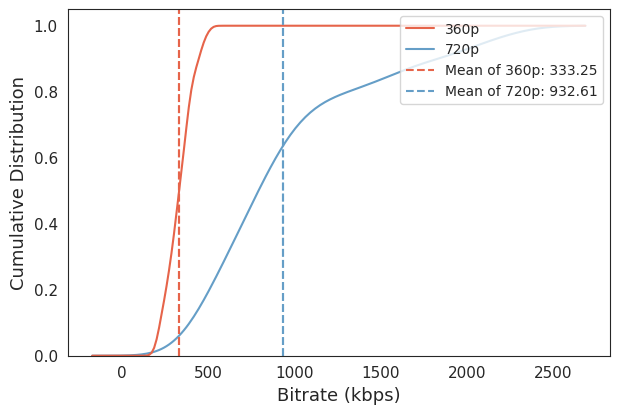

<Figure size 700x450 with 0 Axes>

In [22]:
plt.rcParams["figure.figsize"] = (7, 4.5)
sns.set_style("white")
colors = ["#e6644a", "#659ec7"]
sns.set_palette(sns.color_palette(colors))
ax = sns.kdeplot(data=df, x="bitrate", hue="resolution",
                 cumulative=True, common_norm=False, common_grid=True, legend=True)
ax.set_xlabel("Bitrate (kbps)", fontsize=13)
ax.set_ylabel("Cumulative Distribution", fontsize=13)
plt.axvline(x=bitrates_360.mean(), color=sns.color_palette(
    colors)[0], linestyle="--", label="360p Mean")
plt.axvline(x=bitrates_720.mean(), color=sns.color_palette(
    colors)[1], linestyle="--", label="720p Mean")
handles = [plt.plot([], [], color=sns.color_palette(
    colors)[i], ls="-", markersize=10)[0] for i in range(2)]
labels = ["360p", "720p"]
handles.append(plt.axvline(x=bitrates_360.mean(),
               color=sns.color_palette(colors)[0], linestyle='--'))
handles.append(plt.axvline(x=bitrates_720.mean(),
               color=sns.color_palette(colors)[1], linestyle='--'))
labels.append(f"Mean of 360p: {round(bitrates_360.mean(), 2)}")
labels.append(f"Mean of 720p: {round(bitrates_720.mean(), 2)}")
plt.legend(handles, labels, loc='upper right', fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

plt.savefig("./plot-23.png", format="pdf", bbox_inches="tight")

## Helper Functions

In [23]:
def getMb(val):
    ans = val/(1024*1024)
    return ans

def videoSizeOriginal(df, country):

    only_ads = df.drop(df[df['Total Number of Ads'] == 0].index)

    ads_dict_list = []
    per_video_total = []
    per_video_buffer = []

    for _, row in only_ads.iterrows():
        try:
            temp_dict = row.to_dict()
            total_ads = temp_dict['Total Number of Ads']
            main_video_duration = temp_dict['Duration(s)']
            main_video_size = temp_dict['Size Original (Bytes)']

            total_ad_bytes = []
            total_buffer = []
            for i in range(1, int(total_ads)+1):

                ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)']
                ad_duration = row[f'Advertisement {i} Durationn(s)']
                ad_skippable = row[f'Advertisement {i} Skippable']
                ad_size = row[f'Advertisement {i} Size(Bytes)']
                buff_lost = row[f'Advertisement {i} Main_Buffer_Lost(s)']

                # Skippable ads will consume ad_buff_val (which includes initial time-to-skip)
                if ad_skippable:
                    ad_bytes = ((ad_buff_val)/ad_duration) * ad_size
                    total_ad_bytes.append(getMb(ad_bytes))
                    total_buffer.append(ad_buff_val)
                else:
                    total_ad_bytes.append(getMb(ad_size))
                    total_buffer.append(ad_duration)

                # There can also be mid-roll buffer loss for each ad
                if buff_lost > 0:
                    ad_bytes = (buff_lost / main_video_duration) * \
                        main_video_size
                    total_ad_bytes.append(getMb(ad_bytes))
                    total_buffer.append(buff_lost)

            # Final data consumed by each video (Ad Playback + Main-Video Buffer Lost)
            per_video_total.append(np.array(total_ad_bytes).sum())
            per_video_buffer.append(np.array(total_buffer).sum())

        except:
            continue

    # print(all_proportions)
    for i in range(len(per_video_total)):

        to_add_dict = {
            "Country": country,
            "Data": per_video_total[i],
            "Buffer": per_video_buffer[i]
        }
        ads_dict_list.append(to_add_dict)

    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df


def videoSizeNoLoss(df, country):

    only_ads = df.drop(df[df['Total Number of Ads'] == 0].index)

    ads_dict_list = []
    per_video_total = []
    total_buffer = []

    for _, row in only_ads.iterrows():
        try:
            temp_dict = row.to_dict()
            total_ads = temp_dict['Total Number of Ads']
            main_video_duration = temp_dict['Duration(s)']
            main_video_size = temp_dict['Size Original (Bytes)']
            buffer = []

            total_ad_bytes = []
            for i in range(1, int(total_ads)+1):

                ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)']
                ad_duration = row[f'Advertisement {i} Durationn(s)']
                ad_skippable = row[f'Advertisement {i} Skippable']
                ad_size = row[f'Advertisement {i} Size(Bytes)']
                ski_dur = row[f'Advertisement {i} Skip Duration']
                buff_lost = row[f'Advertisement {i} Main_Buffer_Lost(s)']

                # Skippable ads will consume time-to-skip
                if ad_skippable:
                    ad_bytes = ((5)/ad_duration) * ad_size
                    total_ad_bytes.append(getMb(ad_bytes))
                    buffer.append(0)
                else:
                    total_ad_bytes.append(getMb(ad_size))
                    buffer.append(ad_duration)

            # Final data consumed by each video (Main-Video Size + Ad Playback + Main-Video Buffer Lost)
            total_buffer.append(np.array(buffer).sum())
            per_video_total.append(np.array(total_ad_bytes).sum())

        except:
            continue

    # print(all_proportions)
    for i in range(len(per_video_total)):

        to_add_dict = {
            "Country": country,
            "Data": per_video_total[i],
            "Buffer": total_buffer[i]

        }
        ads_dict_list.append(to_add_dict)

    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df


def videoSizeImproved(df, country):

    only_ads = df.drop(df[df['Total Number of Ads'] == 0].index)

    ads_dict_list = []
    per_video_total = []
    per_video_buffer = []

    for _, row in only_ads.iterrows():
        try:
            temp_dict = row.to_dict()
            total_ads = temp_dict['Total Number of Ads']
            main_video_duration = temp_dict['Duration(s)']
            main_video_size = temp_dict['Size Original (Bytes)']

            total_ad_bytes = []
            total_mid_loss = []
            total_buffer_dur = []
            for i in range(1, int(total_ads)+1):

                ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)']
                ad_duration = row[f'Advertisement {i} Durationn(s)']
                ad_skippable = row[f'Advertisement {i} Skippable']
                ad_size = row[f'Advertisement {i} Size(Bytes)']
                ski_dur = row[f'Advertisement {i} Skip Duration']
                buff_lost = row[f'Advertisement {i} Main_Buffer_Lost(s)']

                # There can also be mid-roll buffer loss for each ad
                if buff_lost > 0:
                    ad_bytes = (buff_lost / main_video_duration) * \
                        main_video_size
                    total_mid_loss.append(getMb(ad_bytes))
                    total_ad_bytes.append(getMb(ad_bytes)/1.69)
                    total_buffer_dur.append(buff_lost)

                # Skippable ads will consume time-to-skip + ad_buff_val
                if ad_skippable:
                    ad_bytes = ((ad_buff_val)/ad_duration) * ad_size
                    total_ad_bytes.append(getMb(ad_bytes))
                    total_buffer_dur.append(ad_buff_val)
                else:
                    total_ad_bytes.append(getMb(ad_size))
                    total_buffer_dur.append(ad_duration)

            # Final data consumed by each video (Main-Video Size + Ad Playback + Main-Video Buffer Lost)
            per_video_total.append(np.array(total_ad_bytes).sum())
            per_video_buffer.append(np.array(total_buffer_dur).sum())

        except:
            continue

    # print(all_proportions)
    for i in range(len(per_video_total)):

        to_add_dict = {
            "Country": country,
            "Data": per_video_total[i],
            "Buffer": per_video_buffer[i]
        }
        ads_dict_list.append(to_add_dict)

    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df


def videoSizeNotSkipped(df, country):

    only_ads = df.drop(df[df['Total Number of Ads'] == 0].index)

    ads_dict_list = []
    per_video_total = []
    per_video_buffer = []

    for _, row in only_ads.iterrows():
        try:
            temp_dict = row.to_dict()
            total_ads = temp_dict['Total Number of Ads']
            main_video_duration = temp_dict['Duration(s)']
            main_video_size = temp_dict['Size Original (Bytes)']

            total_ad_bytes = []
            total_buffer = []
            for i in range(1, int(total_ads)+1):

                ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)']
                ad_duration = row[f'Advertisement {i} Durationn(s)']
                ad_skippable = row[f'Advertisement {i} Skippable']
                ad_size = row[f'Advertisement {i} Size(Bytes)']
                buff_lost = row[f'Advertisement {i} Main_Buffer_Lost(s)']

                # Size for each ad
                total_ad_bytes.append(getMb(ad_size))
                total_buffer.append(ad_duration)

                # There can also be mid-roll buffer loss for ads
                if buff_lost > 0:
                    ad_bytes = (buff_lost / main_video_duration) * \
                        main_video_size
                    total_ad_bytes.append(getMb(ad_bytes))
                    total_buffer.append(buff_lost)

            # Final data consumed by each video (Ad Playback + Main-Video Buffer Lost)
            per_video_total.append(np.array(total_ad_bytes).sum())
            per_video_buffer.append(np.array(total_buffer).sum())

        except:
            continue

    # print(all_proportions)
    for i in range(len(per_video_total)):

        to_add_dict = {
            "Country": country,
            "Data": per_video_total[i],
            "Buffer": per_video_buffer[i]
        }
        ads_dict_list.append(to_add_dict)

    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df


def cumulativeLoss(df, country):

    only_ads = df.drop(df[df['Total Number of Ads'] == 0].index)

    ads_dict_list = []
    per_video_total = []
    per_video_buffer = []

    for _, row in only_ads.iterrows():
        try:
            temp_dict = row.to_dict()
            total_ads = temp_dict['Total Number of Ads']
            main_video_duration = temp_dict['Duration(s)']
            main_video_size = temp_dict['Size Original (Bytes)']

            total_ad_bytes = []
            total_buffer = []
            for i in range(1, int(total_ads)+1):

                ad_buff_val = row[f'Advertisement {i} Advert_Buffer(s)']
                ad_duration = row[f'Advertisement {i} Durationn(s)']
                ad_skippable = row[f'Advertisement {i} Skippable']
                ad_size = row[f'Advertisement {i} Size(Bytes)']
                buff_lost = row[f'Advertisement {i} Main_Buffer_Lost(s)']

                # Skippable ads will consume ad_buff_val (which includes initial time-to-skip)
                if ad_skippable:
                    ad_bytes = ((ad_buff_val-5)/ad_duration) * ad_size
                    total_ad_bytes.append(getMb(ad_bytes))
                    total_buffer.append(ad_buff_val)

                # There can also be mid-roll buffer loss for each ad
                if buff_lost > 0:
                    ad_bytes = (buff_lost / main_video_duration) * \
                        main_video_size
                    total_ad_bytes.append(getMb(ad_bytes))
                    total_buffer.append(buff_lost)

            # Final data consumed by each video (Ad Playback + Main-Video Buffer Lost)
            per_video_total.append(np.array(total_ad_bytes).sum())
            per_video_buffer.append(np.array(total_buffer).sum())

        except:
            continue

    # print(all_proportions)
    for i in range(len(per_video_total)):

        to_add_dict = {
            "Country": country,
            "Data": per_video_total[i],
            "Buffer": per_video_buffer[i]
        }
        ads_dict_list.append(to_add_dict)

    new_df = pd.DataFrame(ads_dict_list).dropna()
    return new_df

## Finding Video Accesses for Each Country (with assumption skippable ads are skipped)

In [24]:
# Finding Video Accesses for Each Country (with assumption skippable ads are skipped)

# Total Main Video Size
pak_total_main_vid = getMb(pakistan['Size Original (Bytes)'].mean(
)) + videoSizeOriginal(pakistan, "Pakistan")['Data'].mean()
brazil_total_main_vid = getMb(barzil['Size Original (Bytes)'].mean(
)) + videoSizeOriginal(barzil, "Brazil")['Data'].mean()
indonesia_total_main_vid = getMb(indonesia['Size Original (Bytes)'].mean(
)) + videoSizeOriginal(indonesia, "Indonesia")['Data'].mean()
mexico_total_main_vid = getMb(mexico['Size Original (Bytes)'].mean(
)) + videoSizeOriginal(mexico, "Mexico")['Data'].mean()

USA_total_main_vid = getMb(USA['Size Original (Bytes)'].mean(
)) + videoSizeOriginal(USA, "USA")['Data'].mean()
japan_total_main_vid = getMb(japan['Size Original (Bytes)'].mean(
)) + videoSizeOriginal(japan, "Japan")['Data'].mean()
germany_total_main_vid = getMb(germany['Size Original (Bytes)'].mean(
)) + videoSizeOriginal(germany, "Germany")['Data'].mean()
canada_total_main_vid = getMb(canada['Size Original (Bytes)'].mean(
)) + videoSizeOriginal(canada, "Canada")['Data'].mean()

# Average Video Accesss
pak_video_access = 2048/pak_total_main_vid
brazil_video_access = 2048/brazil_total_main_vid
mexico_video_access = 2048/mexico_total_main_vid
indonesia_video_access = 2048/indonesia_total_main_vid
USA_video_access = 2048/USA_total_main_vid
japan_video_access = 2048/japan_total_main_vid
germany_video_access = 2048/germany_total_main_vid
canada_video_access = 2048/canada_total_main_vid

print("Pakistan Video Accesses:", pak_video_access)
print("Brazil Video Accesses:", brazil_video_access)
print("Mexico Video Accesses:", mexico_video_access)
print("Indonesia Video Accesses:", indonesia_video_access)
print("USA Video Accesses:", USA_video_access)
print("Japan Video Accesses:", japan_video_access)
print("Germany Video Accesses:", germany_video_access)
print("Canada Video Accesses:", canada_video_access)

Pakistan Video Accesses: 19.595325730914766
Brazil Video Accesses: 18.16677037842653
Mexico Video Accesses: 24.439572173029692
Indonesia Video Accesses: 24.78827863740242
USA Video Accesses: 24.011317149015998
Japan Video Accesses: 24.404301990210723
Germany Video Accesses: 23.553323579927856
Canada Video Accesses: 25.584923129001794


## Finding video accesses for each country with assumption skippable ads are not skipped

In [25]:
# Total Main Video Size
pak_total_main_vid = getMb(pakistan['Size Original (Bytes)'].mean(
)) + videoSizeNotSkipped(pakistan, "Pakistan")['Data'].mean()
brazil_total_main_vid = getMb(barzil['Size Original (Bytes)'].mean(
)) + videoSizeNotSkipped(barzil, "Brazil")['Data'].mean()
indonesia_total_main_vid = getMb(indonesia['Size Original (Bytes)'].mean(
)) + videoSizeNotSkipped(indonesia, "Indonesia")['Data'].mean()
mexico_total_main_vid = getMb(mexico['Size Original (Bytes)'].mean(
)) + videoSizeNotSkipped(mexico, "Mexico")['Data'].mean()

USA_total_main_vid = getMb(USA['Size Original (Bytes)'].mean(
)) + videoSizeNotSkipped(USA, "USA")['Data'].mean()
japan_total_main_vid = getMb(japan['Size Original (Bytes)'].mean(
)) + videoSizeNotSkipped(japan, "Japan")['Data'].mean()
germany_total_main_vid = getMb(germany['Size Original (Bytes)'].mean(
)) + videoSizeNotSkipped(germany, "Germany")['Data'].mean()
canada_total_main_vid = getMb(canada['Size Original (Bytes)'].mean(
)) + videoSizeNotSkipped(canada, "Canada")['Data'].mean()

# Average Video Accesss
pak_video_access_not_skipped = 2048/pak_total_main_vid
brazil_video_access_not_skipped = 2048/brazil_total_main_vid
mexico_video_access_not_skipped = 2048/mexico_total_main_vid
indonesia_video_access_not_skipped = 2048/indonesia_total_main_vid
USA_video_access_not_skipped = 2048/USA_total_main_vid
japan_video_access_not_skipped = 2048/japan_total_main_vid
germany_video_access_not_skipped = 2048/germany_total_main_vid
canada_video_access_not_skipped = 2048/canada_total_main_vid

print("Pakistan Video Accesses:", pak_video_access_not_skipped)
print("Brazil Video Accesses:", brazil_video_access_not_skipped)
print("Mexico Video Accesses:", mexico_video_access_not_skipped)
print("Indonesia Video Accesses:", indonesia_video_access_not_skipped)
print("USA Video Accesses:", USA_video_access_not_skipped)
print("Japan Video Accesses:", japan_video_access_not_skipped)
print("Germany Video Accesses:", germany_video_access_not_skipped)
print("Canada Video Accesses:", canada_video_access_not_skipped)

Pakistan Video Accesses: 15.963340185427283
Brazil Video Accesses: 16.368011689323282
Mexico Video Accesses: 20.400875808600023
Indonesia Video Accesses: 19.01139321312819
USA Video Accesses: 19.975691013009303
Japan Video Accesses: 19.89340082392161
Germany Video Accesses: 20.38694465335558
Canada Video Accesses: 23.047806672908344


## Figure 13 - Average Data Plan Costs for Each Country Across Three Streaming Cases

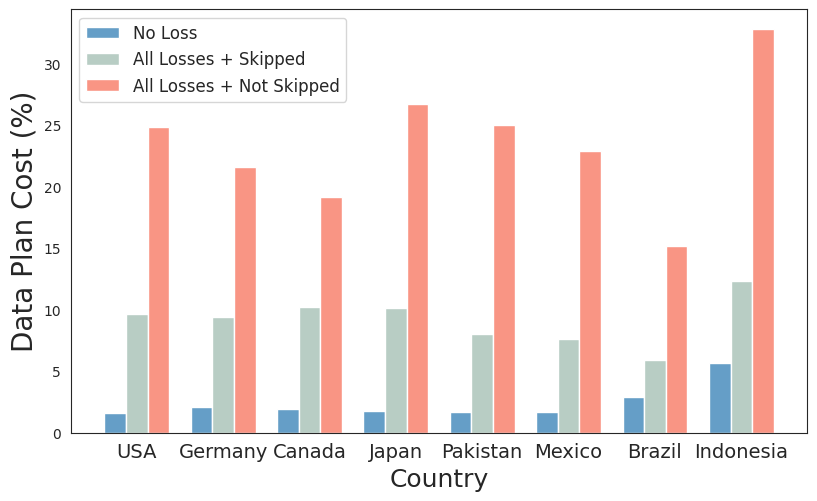

In [26]:
# Developing Countries

pak_total_cons_skip = videoSizeOriginal(pakistan, "Pakistan")['Data'].mean()
pak_total_cons_not_skip = videoSizeNotSkipped(
    pakistan, "Pakistan")['Data'].mean()
pak_noloss = videoSizeNoLoss(pakistan, "Pakistan")['Data'].mean()

brazil_total_cons_skip = videoSizeOriginal(barzil, "Brazil")['Data'].mean()
brazil_total_cons_not_skip = videoSizeNotSkipped(barzil, "Barzil")[
    'Data'].mean()
brazil_noloss = videoSizeNoLoss(barzil, "Brazil")['Data'].mean()

mexico_total_cons_skip = videoSizeOriginal(mexico, "Mexico")['Data'].mean()
mexico_total_cons_not_skip = videoSizeNotSkipped(mexico, "Mexico")[
    'Data'].mean()
mexico_noloss = videoSizeNoLoss(mexico, "Mexico")['Data'].mean()

indonesia_total_cons_skip = videoSizeOriginal(
    indonesia, "Indonesia")['Data'].mean()
indonesia_total_cons_not_skip = videoSizeNotSkipped(
    indonesia, "Indonesia")['Data'].mean()
indonesia_noloss = videoSizeNoLoss(indonesia, "Indonesia")["Data"].mean()

# Getting monthly total consumption using total video accesses
monthly_pak = pak_total_cons_skip * pak_video_access
monthly_pak_2 = pak_total_cons_not_skip * pak_video_access_not_skipped
monthly_pak_3 = pak_noloss * pak_video_access

monthly_brazil = brazil_total_cons_skip * brazil_video_access
monthly_brazil_2 = brazil_total_cons_not_skip * brazil_video_access_not_skipped
monthly_brazil_3 = brazil_noloss * brazil_video_access

monthly_mexico = mexico_total_cons_skip * mexico_video_access
monthly_mexico_2 = mexico_total_cons_not_skip * mexico_video_access_not_skipped
monthly_mexico_3 = mexico_noloss * mexico_video_access

monthly_indonesia = indonesia_total_cons_skip * indonesia_video_access
monthly_indonesia_2 = indonesia_total_cons_not_skip * \
    indonesia_video_access_not_skipped
monthly_indonesia_3 = indonesia_noloss * indonesia_video_access

# getting average data plan cost
monthly_pak = (monthly_pak / 2048) * 100
monthly_pak_2 = (monthly_pak_2 / 2048) * 100
monthly_pak_3 = (monthly_pak_3/2048)*100

monthly_brazil = (monthly_brazil / 2048) * 100
monthly_brazil_2 = (monthly_brazil_2 / 2048) * 100
monthly_brazil_3 = (monthly_brazil_3/2048)*100

monthly_mexico = (monthly_mexico / 2048) * 100
monthly_mexico_2 = (monthly_mexico_2 / 2048) * 100
monthly_mexico_3 = (monthly_mexico_3/2048)*100

monthly_indonesia = (monthly_indonesia / 2048) * 100
monthly_indonesia_2 = (monthly_indonesia_2 / 2048) * 100
monthly_indonesia_3 = (monthly_indonesia_3/2048)*100

# Developed Countries
USA_total_cons_skip = videoSizeOriginal(USA, "USA")['Data'].mean()
USA_total_cons_not_skip = videoSizeNotSkipped(USA, "USA")["Data"].mean()
USA_noloss = videoSizeNoLoss(USA, "USA")["Data"].mean()

germany_total_cons_skip = videoSizeOriginal(germany, "Germany")['Data'].mean()
germany_total_cons_not_skip = videoSizeNotSkipped(germany, "Germany")[
    'Data'].mean()
germany_noloss = videoSizeNoLoss(germany, "Germany")['Data'].mean()

japan_total_cons_skip = videoSizeOriginal(japan, "Japan")['Data'].mean()
japan_total_cons_not_skip = videoSizeNotSkipped(japan, "Japan")['Data'].mean()
japan_noloss = videoSizeNoLoss(japan, "Japan")["Data"].mean()

canada_total_cons_skip = videoSizeOriginal(canada, "Canada")['Data'].mean()
canada_total_cons_not_skip = videoSizeNotSkipped(canada, "Canada")[
    'Data'].mean()
canada_noloss = videoSizeNoLoss(canada, "Canada")["Data"].mean()

# Getting monthly total consumption using total video accesses
monthly_USA = USA_total_cons_skip * USA_video_access
monthly_USA_2 = USA_total_cons_not_skip * USA_video_access_not_skipped
monthly_USA_3 = USA_noloss * USA_video_access

monthly_germany = germany_total_cons_skip * germany_video_access
monthly_germany_2 = germany_total_cons_not_skip * germany_video_access_not_skipped
monthly_germany_3 = germany_noloss * germany_video_access

monthly_japan = japan_total_cons_skip * japan_video_access
monthly_japan_2 = japan_total_cons_not_skip * japan_video_access_not_skipped
monthly_japan_3 = japan_noloss * japan_video_access

monthly_canada = canada_total_cons_skip * canada_video_access
monthly_canada_2 = canada_total_cons_not_skip * canada_video_access_not_skipped
monthly_canada_3 = canada_noloss * canada_video_access

# getting average data plan cost
monthly_USA = (monthly_USA / 2048) * 100
monthly_USA_2 = (monthly_USA_2 / 2048) * 100
monthly_USA_3 = (monthly_USA_3/2048)*100

monthly_germany = (monthly_germany / 2048) * 100
monthly_germany_2 = (monthly_germany_2 / 2048) * 100
monthly_germany_3 = (monthly_germany_3/2048)*100

monthly_japan = (monthly_japan / 2048) * 100
monthly_japan_2 = (monthly_japan_2 / 2048) * 100
monthly_japan_3 = (monthly_japan_3/2048)*100

monthly_canada = (monthly_canada / 2048) * 100
monthly_canada_2 = (monthly_canada_2 / 2048) * 100
monthly_canada_3 = (monthly_canada_3/2048)*100

x_axis = ['USA', 'Germany', 'Canada', 'Japan',
          'Pakistan', 'Mexico', 'Brazil', 'Indonesia']
y_1 = [monthly_USA, monthly_germany, monthly_canada, monthly_japan,
       monthly_pak, monthly_mexico, monthly_brazil, monthly_indonesia]
y_2 = [monthly_USA_2, monthly_germany_2, monthly_canada_2, monthly_japan_2,
       monthly_pak_2, monthly_mexico_2, monthly_brazil_2, monthly_indonesia_2]
y_3 = [monthly_USA_3, monthly_germany_3, monthly_canada_3, monthly_japan_3,
       monthly_pak_3, monthly_mexico_3, monthly_brazil_3, monthly_indonesia_3]


# plt.rcParams["figure.figsize"] = (7,4)
# plt.bar(x_axis, y_1, color="#FF8551", width=0.2)

fig = plt.figure(figsize=(9.5,5.5))
bar_width = 0.25
x_indices = np.arange(len(x_axis))

plt.bar(x_indices - bar_width, y_3, width=bar_width,
        align='center', label='No Loss', color="#659ec7")
plt.bar(x_indices, y_1, width=bar_width, align='center',
        label='All Losses + Skipped', color="#b8cdc4")
plt.bar(x_indices + bar_width, y_2, width=bar_width, align='center',
        label='All Losses + Not Skipped', color="#f99584")

plt.ylabel('Data Plan Cost (%)', fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.xticks(x_indices, x_axis, fontsize= 14)
plt.legend(fontsize=12)

# Show the plot
# plt.show()
plt.savefig("./plot-21.pdf", format="pdf",bbox_inches = "tight")

## Figure 14 - Distribution of Mid-Roll Buffer Loss for Single and Double Ads.

In [27]:
double_ads = []
single_ads = []
count = 0
for index, row in combined_df.iterrows():
    # print("new video")
    last = False
    temp_dict = row.to_dict()
    total_ads = temp_dict['Total Number of Ads']
    if total_ads == 1:
        to_add_dict = {
            "mainVidDuration": row["Duration(s)"],
            "ad_id": row[f'Advertisement 1 ID'],
            "ad_buff_val": row[f'Advertisement 1 Advert_Buffer(s)'],
            "size_ad": row[f'Advertisement 1 Size(Bytes)'],
            "ad_duration": row[f'Advertisement 1 Durationn(s)'],
            "ad_skip": row[f'Advertisement 1 Skippable'],
            "ad_buff_loss": row[f'Advertisement 1 Main_Buffer_Lost(s)'],
            "ad_timestamp": row[f'Avertisement 1 Timestamp'],
            "ad_placement": (row[f'Avertisement 1 Timestamp']/row["Duration(s)"])*100
        }
        single_ads.append(to_add_dict)
    else:
        i = 1
        while i <= int(total_ads):
            if i == int(total_ads):
                last = True
            else:
                ad_timestamp1 = row[f'Avertisement {i} Timestamp']
                ad_timestamp2 = row[f'Avertisement {i+1} Timestamp']
            if last == False and ad_timestamp1 == ad_timestamp2:
                to_add_dict = {
                    "mainVidDuration": row["Duration(s)"],
                    "ad_id_1": row[f'Advertisement {i} ID'],
                    "ad_buff_val_1": row[f'Advertisement {i} Advert_Buffer(s)'],
                    "size_ad_1": row[f'Advertisement {i} Size(Bytes)'],
                    "ad_duration_1": row[f'Advertisement {i} Durationn(s)'],
                    "ad_skip_1": row[f'Advertisement {i} Skippable'],
                    "ad_buff_loss_1": row[f'Advertisement {i} Main_Buffer_Lost(s)'],
                    "ad_timestamp_1": row[f'Avertisement {i} Timestamp'],
                    "ad_placement_1": (row[f'Avertisement {i} Timestamp']/row["Duration(s)"])*100,
                    "ad_id_2": row[f'Advertisement {i+1} ID'],
                    "ad_buff_val_2": row[f'Advertisement {i+1} Advert_Buffer(s)'],
                    "size_ad_2": row[f'Advertisement {i+1} Size(Bytes)'],
                    "ad_duration_2": row[f'Advertisement {i+1} Durationn(s)'],
                    "ad_skip_2": row[f'Advertisement {i+1} Skippable'],
                    "ad_buff_loss_2": row[f'Advertisement {i+1} Main_Buffer_Lost(s)'],
                    "ad_timestamp_2": row[f'Avertisement {i+1} Timestamp'],
                    "ad_placement_2": (row[f'Avertisement {i+1} Timestamp']/row["Duration(s)"])*100
                }
                double_ads.append(to_add_dict)
                i = i + 2
            else:
                try:
                    to_add_dict = {
                        "mainVidDuration": row["Duration(s)"],
                        "ad_id": row[f'Advertisement {i} ID'],
                        "ad_buff_val": row[f'Advertisement {i} Advert_Buffer(s)'],
                        "size_ad": row[f'Advertisement {i} Size(Bytes)'],
                        "ad_duration": row[f'Advertisement {i} Durationn(s)'],
                        "ad_skip": row[f'Advertisement {i} Skippable'],
                        "ad_buff_loss": row[f'Advertisement {i} Main_Buffer_Lost(s)'],
                        "ad_timestamp": row[f'Avertisement {i} Timestamp'],
                        "ad_placement": (row[f'Avertisement {i} Timestamp']/row["Duration(s)"])*100
                    }
                    single_ads.append(to_add_dict)
                except:
                    print(temp_dict["Main_Video_Url"])
                i = i + 1

single = pd.DataFrame(single_ads).dropna()
double = pd.DataFrame(double_ads).dropna()

single.to_csv("single.csv", index=False)
double.to_csv("double.csv", index=False)

## Figure 15 - Distribution of Data Consumed by Ads Across Different Types of Video Stream: Developed Region (Left); Developing Region (Right).

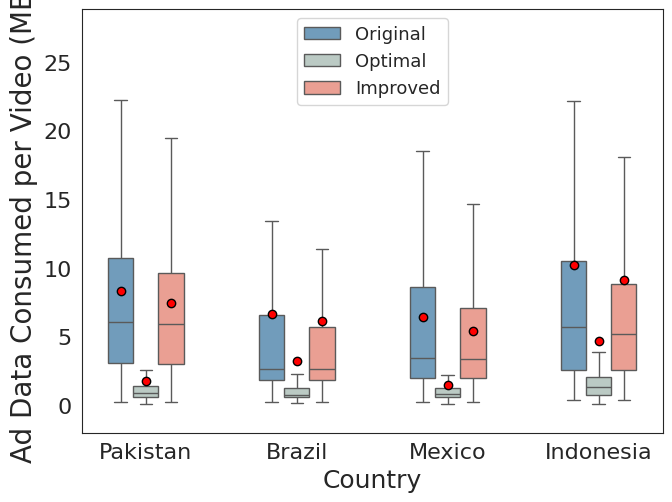

In [28]:
pak_vid_original = videoSizeOriginal(pakistan, "Pakistan")
pak_vid_original['Type'] = 'Original'
pak_vid_noloss = videoSizeNoLoss(pakistan, "Pakistan")
pak_vid_noloss['Type'] = 'Optimal'
pak_vid_improved = videoSizeImproved(pakistan, "Pakistan")
pak_vid_improved['Type'] = "Improved"
pak_vid = pd.concat([pak_vid_original, pak_vid_noloss, pak_vid_improved])

brazil_vid_original = videoSizeOriginal(barzil, "Brazil")
brazil_vid_original['Type'] = 'Original'
brazil_vid_noloss = videoSizeNoLoss(barzil, "Brazil")
brazil_vid_noloss['Type'] = 'Optimal'
brazil_vid_improved = videoSizeImproved(barzil, "Brazil")
brazil_vid_improved['Type'] = "Improved"
brazil_vid = pd.concat(
    [brazil_vid_original, brazil_vid_noloss, brazil_vid_improved])

mexico_vid_original = videoSizeOriginal(mexico, "Mexico")
mexico_vid_original['Type'] = 'Original'
mexico_vid_noloss = videoSizeNoLoss(mexico, "Mexico")
mexico_vid_noloss['Type'] = 'Optimal'
mexico_vid_improved = videoSizeImproved(mexico, "Mexico")
mexico_vid_improved['Type'] = "Improved"
mexico_vid = pd.concat(
    [mexico_vid_original, mexico_vid_noloss, mexico_vid_improved])

indonesia_vid_original = videoSizeOriginal(indonesia, "Indonesia")
indonesia_vid_original['Type'] = 'Original'
indonesia_vid_noloss = videoSizeNoLoss(indonesia, "Indonesia")
indonesia_vid_noloss['Type'] = 'Optimal'
indonesia_vid_improved = videoSizeImproved(indonesia, "Indonesia")
indonesia_vid_improved['Type'] = "Improved"
indonesia_vid = pd.concat(
    [indonesia_vid_original, indonesia_vid_noloss, indonesia_vid_improved])

what_if_developing = pd.concat(
    [pak_vid, brazil_vid, mexico_vid, indonesia_vid])

plt.rcParams["figure.figsize"] = (7.5, 5.5)

colors = ["#659ec7", "#b8cdc4", "#f99584"]
sns.set_palette(sns.color_palette(colors))
ax = sns.boxplot(data=what_if_developing, x="Country", y="Data", hue="Type", width=0.5, showmeans=True, meanprops={
                 "marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": "6"}, showfliers=False)
# ax.set_ylabel("Data consumed by Ads Per Video (MB)")
ax.margins(y=0.3)
ax.set_ylabel("Ad Data Consumed per Video (MB)", fontsize=20)
ax.set_xlabel("Country", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(fontsize=13)
plt.ylim(bottom=-2)
plt.plot([], [], 'o',  color='red', label='mean')
# plt.legend(fontsize=8)

plt.savefig("./plot-18.pdf", format="pdf",bbox_inches = "tight")
# plt.savefig("./AdConsumptionDeveloping.pdf",format="pdf")

Experiment 6 p_value (Original vs Improved): 0.07118498318945973
Experiment 6 p_value (Original vs Improved): 1.397626987158879e-32


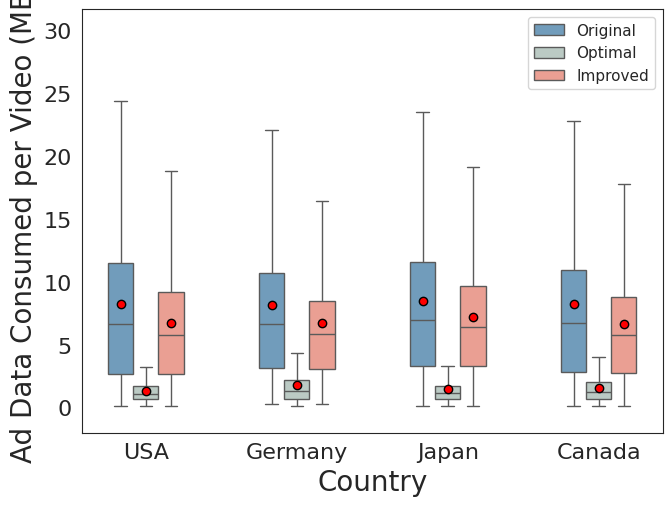

In [ ]:
USA_vid_original = videoSizeOriginal(USA, "USA")
USA_vid_original['Type'] = 'Original'
USA_vid_noloss = videoSizeNoLoss(USA, "USA")
USA_vid_noloss['Type'] = 'Optimal'
USA_vid_improved = videoSizeImproved(USA, "USA")
USA_vid_improved['Type'] = "Improved"
USA_vid = pd.concat([USA_vid_original, USA_vid_noloss, USA_vid_improved])

germany_vid_original = videoSizeOriginal(germany, "Germany")
germany_vid_original['Type'] = 'Original'
germany_vid_noloss = videoSizeNoLoss(germany, "Germany")
germany_vid_noloss['Type'] = 'Optimal'
germany_vid_improved = videoSizeImproved(germany, "Germany")
germany_vid_improved['Type'] = "Improved"
germany_vid = pd.concat(
    [germany_vid_original, germany_vid_noloss, germany_vid_improved])

japan_vid_original = videoSizeOriginal(japan, "Japan")
japan_vid_original['Type'] = 'Original'
japan_vid_noloss = videoSizeNoLoss(japan, "Japan")
japan_vid_noloss['Type'] = 'Optimal'
japan_vid_improved = videoSizeImproved(japan, "Japan")
japan_vid_improved['Type'] = "Improved"
japan_vid = pd.concat(
    [japan_vid_original, japan_vid_noloss, japan_vid_improved])

canada_vid_original = videoSizeOriginal(canada, "Canada")
canada_vid_original['Type'] = 'Original'
canada_vid_noloss = videoSizeNoLoss(canada, "Canada")
canada_vid_noloss['Type'] = 'Optimal'
canada_vid_improved = videoSizeImproved(canada, "Canada")
canada_vid_improved['Type'] = "Improved"
canada_vid = pd.concat(
    [canada_vid_original, canada_vid_noloss, canada_vid_improved])

what_if_developed = pd.concat([USA_vid, germany_vid, japan_vid, canada_vid])

plt.rcParams["figure.figsize"] = (7.5, 5.5)

colors = ["#659ec7", "#b8cdc4", "#f99584"]
sns.set_palette(sns.color_palette(colors))
ax = sns.boxplot(data=what_if_developed, x="Country", y="Data", hue="Type", width=0.5, showmeans=True, meanprops={
                 "marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": "6"}, showfliers=False)

# ax.set_ylabel("Ad Data Consumed Per Video (MB)")
ax.margins(y=0.3)
ax.set_ylabel("Ad Data Consumed per Video (MB)",fontsize=20)
ax.set_xlabel("Country", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(fontsize=11)
plt.ylim(bottom=-2)
plt.plot([], [], 'o',  color='red', label='mean')
# plt.legend(loc='upper center')

plt.savefig("./plot-17.pdf", format="pdf",bbox_inches = "tight")


_, p_value = stats.ttest_ind(
    what_if_developed['Data'], what_if_developing['Data'], equal_var=False)
print("Experiment 6 p_value (Original vs Improved):", p_value)


exp_6_original = what_if_developed[what_if_developed['Type'] == 'Original']
exp_6_improved = what_if_developed[what_if_developed['Type'] == 'Improved']

_, p_value = stats.ttest_ind(
    exp_6_original['Data'], exp_6_improved['Data'], equal_var=False)
print("Experiment 6 p_value (Original vs Improved):", p_value)


# plt.savefig("./AdConsumptionDeveloping.pdf",format="pdf")